In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not_Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')
print(dete_survey.shape)
print(tafe_survey.shape)

(822, 56)
(702, 72)


In [ ]:
dete_survey.isnull().sum()
tafe_survey.isnull().sum()

# drop and rename columns using lower letters

In [79]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
dete_survey_updated.columns = dete_survey_updated.columns.str.rstrip().str.lower()
tafe_survey_updated.columns = tafe_survey_updated.columns.str.rstrip().str.lower()
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.replace('.', '')
tafe_survey_updated.columns = tafe_survey_updated.columns.str.replace(' ', '_').str.replace('.', '')

# check to make sure dates are making sense

In [80]:
s1=dete_survey_updated.cease_date.value_counts().sort_index(ascending= True)
s2=dete_survey_updated.cease_date.value_counts().sort_index(ascending= False)
s3=tafe_survey_updated.cessation_year.value_counts().sort_index(ascending= True)
s4=tafe_survey_updated.cessation_year.value_counts().sort_index(ascending= False)
inx1=dete_survey_updated['separationtype'].str.contains('Retirement', na=False).value_counts()
inx2=tafe_survey_updated['reason_for_ceasing_employment'].str.contains('Retirement', na=False).value_counts()

In [81]:
# extracting year from cease_date
dete_survey_updated['cease_date']=dete_survey_updated.cease_date.str.split('/').str[1]
# replace non-date data from dete_start_date with NaN
dete_survey_updated['dete_start_date']=dete_survey_updated['dete_start_date'].str.replace('Not Stated', 'NaN').str.strip()
# caluclating length
date1=dete_survey_updated['cease_date'].astype(float)
date2=dete_survey_updated['dete_start_date'].astype(float)
dete_survey_updated['institute_service']=date1-date2

# check types of termination

In [82]:
tafe_survey_updated.sort_values(by=['reason_for_ceasing_employment']).head(1)
tafe_survey_updated = tafe_survey_updated.set_index(['reason_for_ceasing_employment'])
list(tafe_survey_updated.index.values)
tafe_survey_updated.head(1)

,record_id,institute,workarea,cessation_year,contributing_factors_career_move_-_public_sector,contributing_factors_career_move_-_private_sector,contributing_factors_career_move_-_self-employment,contributing_factors_ill_health,contributing_factors_maternity/family,contributing_factors_dissatisfaction,...,contributing_factors_study,contributing_factors_travel,contributing_factors_other,contributing_factors_none,gender_what_is_your_gender?,currentage_current_age,employment_type_employment_type,classification_classification,lengthofserviceoverall_overall_length_of_service_at_institute_(in_years),lengthofservicecurrent_length_of_service_at_current_workplace_(in_years)
reason_for_ceasing_employment,,,,,,,,,,,,,,,,,,,,,
Contract Expired,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2


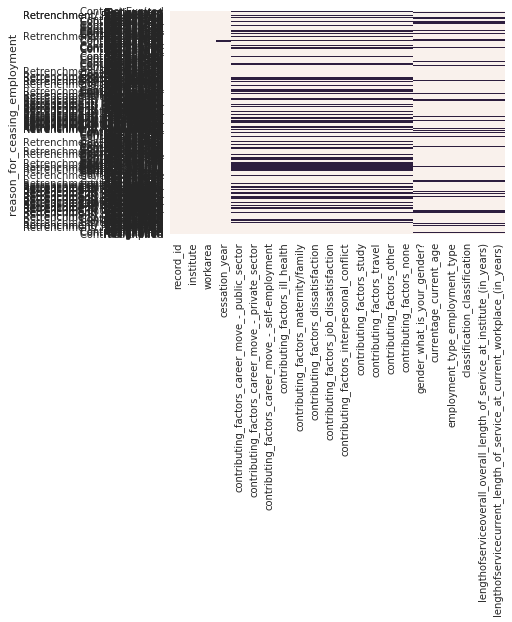

In [6]:
%matplotlib inline
sns.heatmap(tafe_survey_updated.isnull(), cbar=False)

# generate job disatifaction coloumn

In [7]:
# remove unwanted coloumns
tafe_survey_updated=tafe_survey_updated.loc['Resignation', :]
# check column names
tafe_survey_updated.columns

Index(['record_id', 'institute', 'workarea', 'cessation_year',
       'contributing_factors_career_move_-_public_sector',
       'contributing_factors_career_move_-_private_sector',
       'contributing_factors_career_move_-_self-employment',
       'contributing_factors_ill_health',
       'contributing_factors_maternity/family',
       'contributing_factors_dissatisfaction',
       'contributing_factors_job_dissatisfaction',
       'contributing_factors_interpersonal_conflict',
       'contributing_factors_study', 'contributing_factors_travel',
       'contributing_factors_other', 'contributing_factors_none',
       'gender_what_is_your_gender?', 'currentage_current_age',
       'employment_type_employment_type', 'classification_classification',
       'lengthofserviceoverall_overall_length_of_service_at_institute_(in_years)',
       'lengthofservicecurrent_length_of_service_at_current_workplace_(in_years)'],
      dtype='object')

In [9]:
tafe_survey_updated['contributing_factors_dissatisfaction'].value_counts()
tafe_survey_updated['contributing_factors_job_dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: contributing_factors_job_dissatisfaction, dtype: int64

In [19]:
def findvalue(v):
    if v == 'NaN':
        return np.nan
    elif v == '-':
        return False
    else:
        return True
tc=tafe_survey_updated[['contributing_factors_dissatisfaction', 'contributing_factors_job_dissatisfaction']]
tc=tc.applymap(findvalue)
tafe_survey_updated['dissatisfied']=tc.any(axis=1, skipna=False)
tafe_survey_updated['dissatisfied'].value_counts()

False    241
True      99
Name: dissatisfied, dtype: int64

In [21]:
list(dete_survey_updated.columns)

['id',
 'separationtype',
 'cease_date',
 'dete_start_date',
 'role_start_date',
 'position',
 'classification',
 'region',
 'business_unit',
 'employment_status',
 'career_move_to_public_sector',
 'career_move_to_private_sector',
 'interpersonal_conflicts',
 'job_dissatisfaction',
 'dissatisfaction_with_the_department',
 'physical_work_environment',
 'lack_of_recognition',
 'lack_of_job_security',
 'work_location',
 'employment_conditions',
 'maternity/family',
 'relocation',
 'study/travel',
 'ill_health',
 'traumatic_incident',
 'work_life_balance',
 'workload',
 'none_of_the_above',
 'gender',
 'age',
 'aboriginal',
 'torres_strait',
 'south_sea',
 'disability',
 'nesb',
 'institute_service']

In [22]:
tc=dete_survey_updated[[ 'job_dissatisfaction',
 'dissatisfaction_with_the_department',
 'physical_work_environment',
 'lack_of_recognition',
 'lack_of_job_security',
 'work_location',
 'employment_conditions','work_life_balance',
 'workload']]
tc=tc.applymap(findvalue)
dete_survey_updated['dissatisfied']=tc.any(axis=1, skipna=False)
dete_survey_updated['dissatisfied'].value_counts()

True    822
Name: dissatisfied, dtype: int64

In [25]:
dete_survey_updated['institute']='DETE'
tafe_survey_updated['institute']='TAFE'

reason_for_ceasing_employment
Resignation    TAFE
Name: institute, dtype: object

# combine two dataframes, categorize serv col

In [33]:
combined=pd.concat([dete_survey_updated, tafe_survey_updated])
combined.dropna(thresh=1000, axis=1)
type(combined['institute_service'][1])

numpy.float64

In [36]:
def year_bin(x):
    if x <= 3:
        return 'Newbie'
    elif x <= 6:
        return 'Sophomore'
    elif x <= 10:
        return 'Tenured'
    elif x >= 11:
        return 'Sage'
combined['service_cat']=combined['institute_service'].apply(year_bin)
combined['service_cat'].value_counts()

Sage         144
Newbie        45
Tenured       22
Sophomore     17
Name: service_cat, dtype: int64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


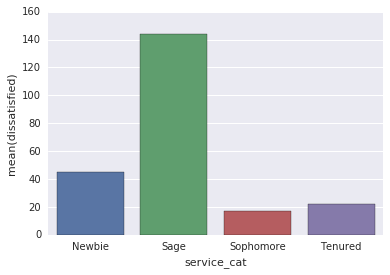

In [76]:
gr_result=combined.groupby(['service_cat'])['dissatisfied'].sum()
sns.barplot(gr_result.index, gr_result)